### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop rows with any missing values
data_cleaned = data.dropna()

4. What proportion of the total observations chose to accept the coupon?



In [6]:
# Proportion of people who accepted the coupon
# mean = total value/total number, proportion = total value of "Y"/total number.  Since all number is 1/0 in value,  so mean=proportion
acceptance_rate = data['Y'].mean()
print("acceptance_rate: ")
print(acceptance_rate)

acceptance_rate: 
0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

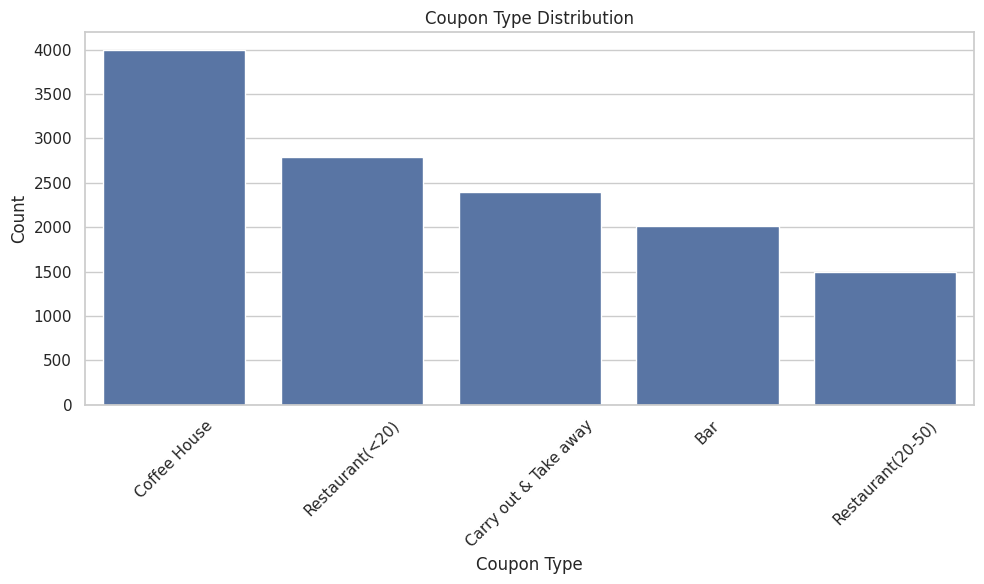

In [7]:
# Set plot style
sns.set(style='whitegrid')

# Count the frequency of each coupon type
coupon_counts = data['coupon'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

# Add labels and title
plt.xticks(rotation=45)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Type Distribution')

# Show the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

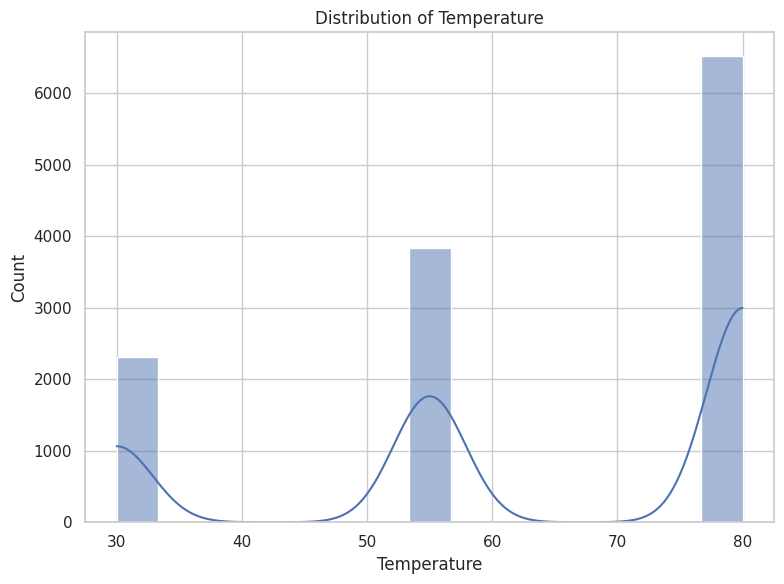

In [8]:
# Set the style
sns.set(style='whitegrid')

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['temperature'], bins=15, kde=True)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature')

# Show the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# Filter for bar-related coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Display the first few rows to verify
print(bar_coupons.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [10]:
# Proportion of accepted bar coupons
bar_acceptance_rate = bar_coupons['Y'].mean()

# Display the result as a percentage
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<ipython-input-11-0a335085b0c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['bar_visit_group'] = bar_coupons['Bar'].apply(


Acceptance Rate by Bar Visit Frequency:
bar_visit_group
great than 3 time a month     76.88%
less or equal to 3 a month    37.06%
Name: Y, dtype: object


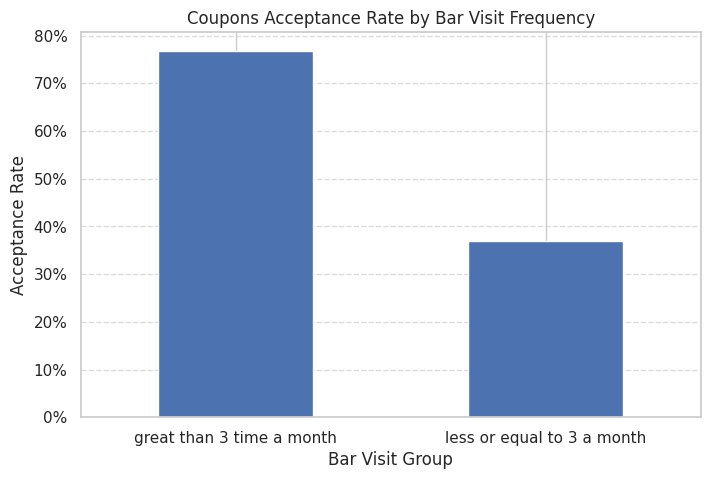

In [11]:
# Define low and high frequency bar-goers
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

# Filter only bar-related coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Create groups based on Bar visit frequency
bar_coupons['bar_visit_group'] = bar_coupons['Bar'].apply(
    lambda x: 'less or equal to 3 a month' if x in low_freq else ('great than 3 time a month' if x in high_freq else 'Unknown')
)

# Remove 'Unknown' if any
bar_coupons_filtered = bar_coupons[bar_coupons['bar_visit_group'] != 'Unknown']

# Calculate acceptance rate by group
acceptance_by_group = bar_coupons_filtered.groupby('bar_visit_group')['Y'].mean()

# Display the results
print("Acceptance Rate by Bar Visit Frequency:")
print(acceptance_by_group.apply(lambda x: f"{x:.2%}"))
# Create a bar chart
plt.figure(figsize=(8, 5))  # set figure size
acceptance_by_group.plot(kind='bar')

# Add labels and title
plt.title('Coupons Acceptance Rate by Bar Visit Frequency')
plt.xticks(rotation=0)
plt.xlabel('Bar Visit Group')
plt.ylabel('Acceptance Rate')

# Format y-axis to percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Show gridlines for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers who go to bars >1/month and are over 25: 77.21%
Acceptance rate for all other drivers: 38.38%


<ipython-input-13-50db3f11ca8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['age_num'] = bar_coupons['age'].str.extract(r'(\d+)').astype(float)


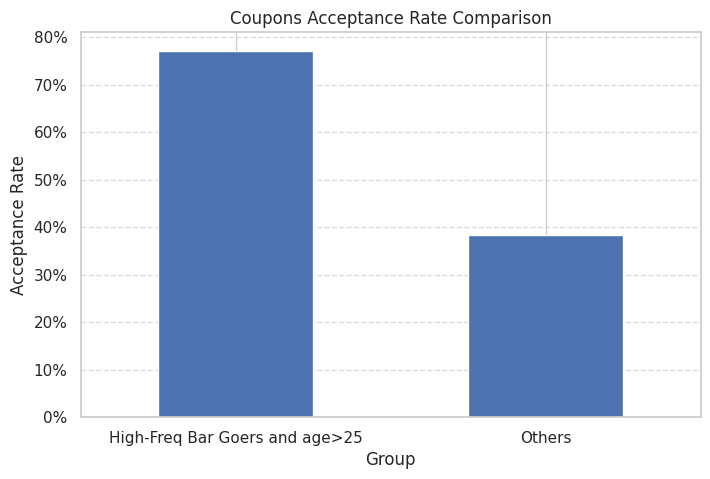

In [13]:
# Step 1: Filter only bar coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Step 2: Convert 'age' to a numeric lower-bound
bar_coupons['age_num'] = bar_coupons['age'].str.extract(r'(\d+)').astype(float)

# Step 2: Define high-frequency bar goers
high_freq_bar = ['4~8', 'gt8']

# Step 3: Create a boolean mask for Group A
group_a_mask = (bar_coupons['Bar'].isin(high_freq_bar)) & (bar_coupons['age_num'] > 25)

# Step 4: Split into Group A and Group B
group_a = bar_coupons[group_a_mask]
group_b = bar_coupons[~group_a_mask]

# Step 5: Compute acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Step 6: Display results
print(f"Acceptance rate for drivers who go to bars >1/month and are over 25: {rate_a:.2%}")
print(f"Acceptance rate for all other drivers: {rate_b:.2%}")
acceptance_rates = pd.Series(
    [rate_a, rate_b],
    index=[
        'High-Freq Bar Goers and age>25',
        'Others'
    ]
)

# Step 7: Plot as bar chart
plt.figure(figsize=(8, 5))
acceptance_rates.plot(kind='bar')

# Add labels and title
plt.title('Coupons Acceptance Rate Comparison')
plt.xticks(rotation=0)
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Show grid for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate (frequent bar-goers, no kids, non-farming jobs): 77.49%
Acceptance rate (everyone else): 37.19%


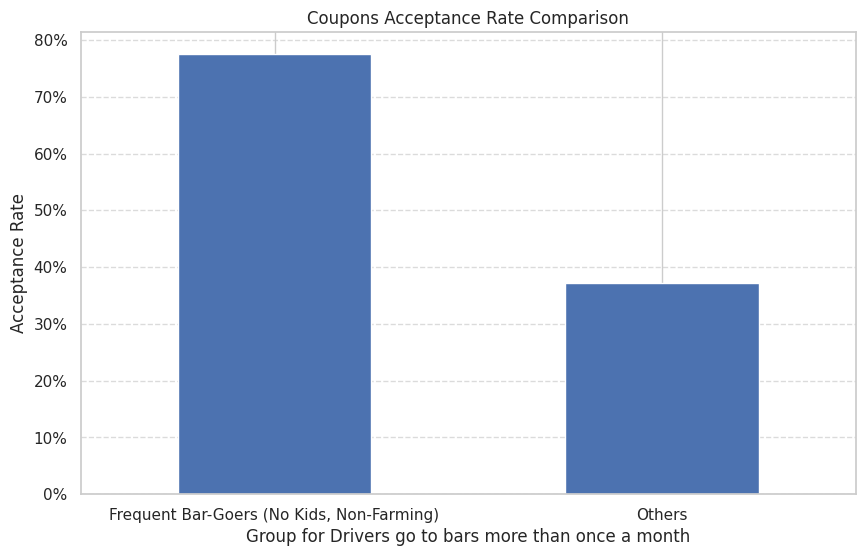

In [14]:
# Step 1: Filter only bar coupons
bar_coupons = data[data['coupon'] == 'Bar'].copy()

# Step 2: Define frequent bar-goers
high_freq_bar = ['4~8', 'gt8']

# Step 3: Create mask for Group A
group_a_mask = (
    bar_coupons['Bar'].isin(high_freq_bar) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry')
)

# Step 4: Split into Group A and Group B
group_a = bar_coupons[group_a_mask]
group_b = bar_coupons[~group_a_mask]

# Step 5: Calculate acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Step 6: Print results
print(f"Acceptance rate (frequent bar-goers, no kids, non-farming jobs): {rate_a:.2%}")
print(f"Acceptance rate (everyone else): {rate_b:.2%}")
# Step 6: Put the rates into a Series for easier plotting
acceptance_rates = pd.Series(
    [rate_a, rate_b],
    index=[
        'Frequent Bar-Goers (No Kids, Non-Farming)',
        'Others'
    ]
)

# Step 7: Plot the bar chart
plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar')

# Add labels and title
plt.title('Coupons Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group for Drivers go to bars more than once a month')

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Show the plot
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate (Group A - matching any condition): 58.73%
Acceptance rate (Group B - everyone else): 54.76%


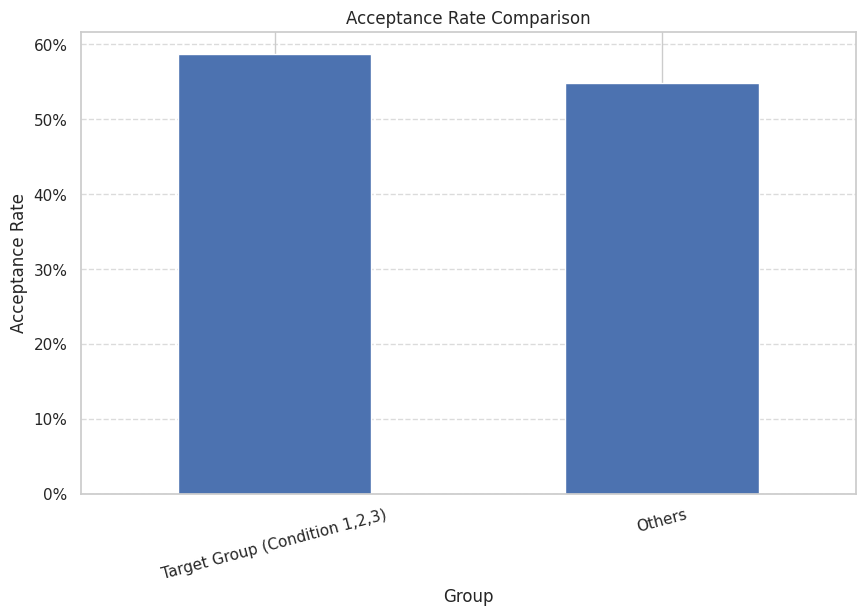

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Copy data to avoid SettingWithCopyWarning
df = data.copy()

# Step 2: Make sure age_num column is numeric
df['age_num'] = df['age'].str.extract(r'(\d+)').astype(float)

# Step 3: Define the three conditions

# Condition 1
cond1 = (
    (df['Bar'].isin(['4~8', 'gt8'])) &
    (df['passanger'] != 'Kid(s)') &
    (df['maritalStatus'] != 'Widowed')
)

# Condition 2
cond2 = (
    (df['Bar'].isin(['4~8', 'gt8'])) &
    (df['age_num'] < 30)
)

# Condition 3
cond3 = (
    (df['CoffeeHouse'].isin(['4~8', 'gt8'])) &
    (df['income'] == 'Less than $12500') | (df['income'] == '$12500 - $24999') | (df['income'] == '$25000 - $37499') | (df['income'] == '$37500 - $49999')
)

# Step 4: Group A (people satisfying any of the three)
group_a_mask = cond1 | cond2 | cond3

# Step 5: Create groups
group_a = df[group_a_mask]
group_b = df[~group_a_mask]

# Step 6: Calculate acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Step 8: Print results
print(f"Acceptance rate (Group A - matching any condition): {rate_a:.2%}")
print(f"Acceptance rate (Group B - everyone else): {rate_b:.2%}")

# Step 7: Bar Chart
acceptance_rates = pd.Series(
    [rate_a, rate_b],
    index=[
        'Target Group (Condition 1,2,3)',
        'Others'
    ]
)

plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar')

plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')

# Format Y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels slightly
plt.xticks(rotation=15)

# Show plot
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Those drivers who are high frequentcy of Bar visiting, the age between 25-30, the occupation is not framing, fishing or forestry and the passengers are not kids will very likely accept the bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's walk through a similar analysis for a different coupon group. Let's pick "Coffee House" coupons as the new focus — it's a common one and usually has interesting patterns.

Step 1: Filter Data for Coffee House Coupons

In [19]:
# Filter only Coffee House coupons
coffee_coupons = data[data['coupon'] == 'Coffee House'].copy()

Step 2: Clean & Prep Data

In [20]:
# Extract numeric age from age column
coffee_coupons['age_num'] = coffee_coupons['age'].str.extract(r'(\d+)').astype(float)

Step 3: Explore Acceptance Patterns

A. Acceptance Rate by Age groups:

<ipython-input-22-bdbe6db97176>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_by_age = coffee_coupons.groupby('age_group')['Y'].mean()


Acceptance Rate by Age Group:
age_group
<25      55.01%
25-35    49.86%
35-50    46.45%
50+        nan%
Name: Y, dtype: object




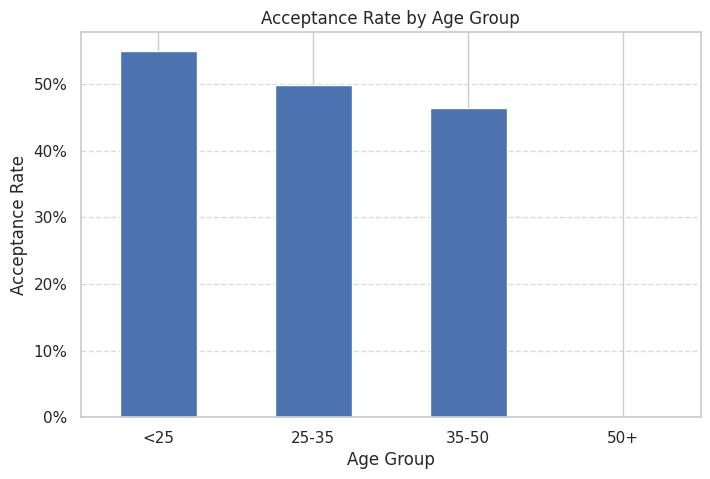

In [22]:
# Step 1: Bin age into groups
coffee_coupons['age_group'] = pd.cut(coffee_coupons['age_num'],
    bins=[0, 25, 35, 50, 100],
    labels=['<25', '25-35', '35-50', '50+']
)

# Step 2: Acceptance rate by age group
acceptance_by_age = coffee_coupons.groupby('age_group')['Y'].mean()

# Print acceptance rate by age group
print("Acceptance Rate by Age Group:")
print(acceptance_by_age.apply(lambda x: f"{x:.2%}"))
print("\n")  # Print an empty line for better spacing

# Plot for age group
plt.figure(figsize=(8, 5))
acceptance_by_age.plot(kind='bar')

plt.title('Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

B. Acceptance rate by CoffeeHouse frequency

Acceptance Rate by CoffeeHouse Visit Frequency:
CoffeeHouse
1~3      64.78%
4~8      68.59%
gt8      65.79%
less1    48.19%
never    18.88%
Name: Y, dtype: object




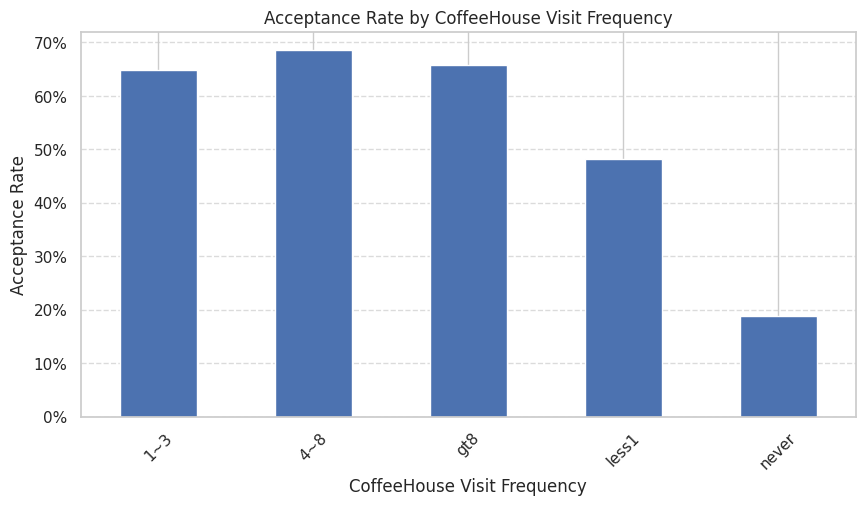

In [23]:
# Step 3: Acceptance rate by CoffeeHouse frequency
acceptance_by_coffee = coffee_coupons.groupby('CoffeeHouse')['Y'].mean()

# Print acceptance rate by CoffeeHouse frequency
print("Acceptance Rate by CoffeeHouse Visit Frequency:")
print(acceptance_by_coffee.apply(lambda x: f"{x:.2%}"))
print("\n")

# Plot for CoffeeHouse frequency
plt.figure(figsize=(10, 5))
acceptance_by_coffee.plot(kind='bar')

plt.title('Acceptance Rate by CoffeeHouse Visit Frequency')
plt.xlabel('CoffeeHouse Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Hypothesize

From the data findings, the high frequency coffee shop goers will very likely accept the coffee coupons.